## 範例目標

*  了解如何調用 opencv 的 color histogram

## 範例重點
* [cv2.calcHist 這個函數的調用方式以及參數說明](#調用方式)
* [理解 cv2.calcHist 函數輸出的資料的結構以及含義](#理解輸出結構以及含義)

In [19]:
import os
import numpy as np
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

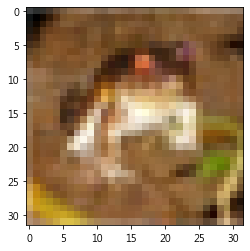

In [2]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

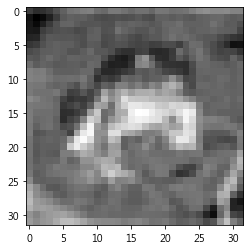

In [14]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")
plt.show()

### 調用方式

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* images (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

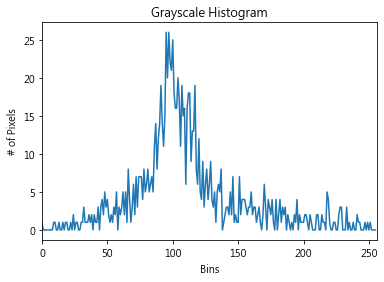

In [15]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### 理解輸出結構以及含義

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


In [20]:
# 若想知道 [16, 32] 的 bins 內有幾個 pixel
print(np.sum(hist[15:32]))

10.0


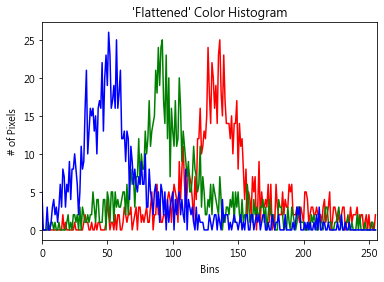

In [6]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

## 作業目標
* 畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？
* 確保同學知道如何改變參數以及理解 cv2.calcHist 這個函數輸出的資料含義